<a href="https://colab.research.google.com/github/doramasma/boat-types-recognition/blob/master/boat_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset boat-types




In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

 buoy  'cruise ship'   kayak   sailboat


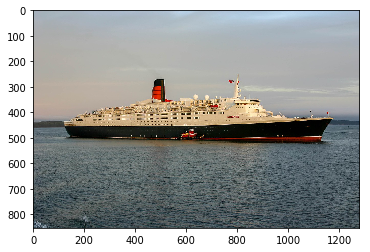

In [2]:
!ls "/content/drive/My Drive/datasets/boat-types-recognition"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive//datasets/boat-types-recognition/cruise ship/waters-sea-ship-boat-3176281.jpg', 'r')
imshow(np.asarray(pil_im))




Found 790 images belonging to 4 classes.
Found 195 images belonging to 4 classes.
Epoch 1/15
50/50 [==============================] - 132s 3s/step - loss: 1.3838 - acc: 0.4578 - val_loss: 1.1065 - val_acc: 0.5344

Epoch 00001: val_loss improved from inf to 1.10646, saving model to /content/drive/My Drive//datasets/weights.hdf5
Epoch 2/15
50/50 [==============================] - 111s 2s/step - loss: 1.0923 - acc: 0.5341 - val_loss: 1.0165 - val_acc: 0.5559

Epoch 00002: val_loss improved from 1.10646 to 1.01645, saving model to /content/drive/My Drive//datasets/weights.hdf5
Epoch 3/15
50/50 [==============================] - 115s 2s/step - loss: 1.0092 - acc: 0.5759 - val_loss: 0.9271 - val_acc: 0.6462

Epoch 00003: val_loss improved from 1.01645 to 0.92709, saving model to /content/drive/My Drive//datasets/weights.hdf5
Epoch 4/15
50/50 [==============================] - 117s 2s/step - loss: 0.9513 - acc: 0.6272 - val_loss: 0.8744 - val_acc: 0.6462

Epoch 00004: val_loss improved from 0

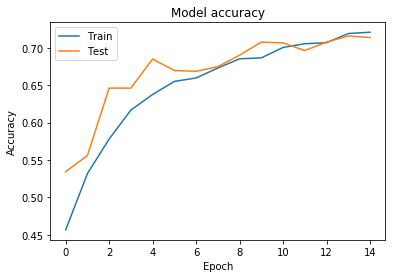

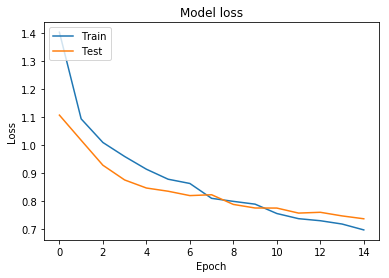

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time

batch_size = 128


train_data_dir = '/content/drive/My Drive//datasets/boat-types-recognition'
validation_data_dir = '/content/drive/My Drive//datasets/boat-types-recognition'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='categorical',
        subset='validation')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 15
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive//datasets/weights.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=50,
        callbacks=[checkpointer]
)
#Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

[1]
[3]
[1]


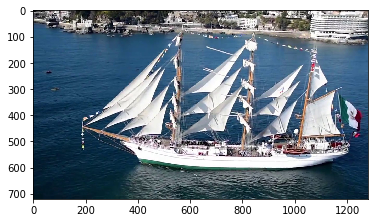

In [5]:
from keras.models import Sequential,load_model
model = load_model('/content/drive/My Drive//datasets/weights.hdf5')

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive//datasets/maxresdefault.jpg', 'r')
imshow(np.asarray(pil_im))


#print(validation_generator.class_indices)


crucero = np.array((Image.open('/content/drive/My Drive//datasets/Cruceros-desde-Barcelona-por-el-Mediterráneo-2019-810x540.jpg')).resize((100,100))).reshape(1,100,100,3)/255
velero = np.array((Image.open('/content/drive/My Drive//datasets/maxresdefault.jpg')).resize((100,100))).reshape(1,100,100,3)/255
crucero2 = np.array((Image.open('/content/drive/My Drive//datasets/la-verdadera-historia-de-como-se-encontro-el-titanic.jpg')).resize((100,100))).reshape(1,100,100,3)/255

pre1 = model.predict_classes([crucero])
print(pre1)
pre2 = model.predict_classes([velero])
print(pre2)
pre3 = model.predict_classes([crucero2])
print(pre3)

